In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from plot_functions import *
from sklearn.model_selection import KFold

In [2]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os


def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [3]:
n_splits = 10
import sys
case=2
a=2
cost='abs'

In [4]:
def get_tensor_appliance(df, dfc, appliance):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] ]).flatten()
    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 1, stop - start))
    M, N, O = tensor.shape
    return tensor

In [5]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()
    print(energy_cols)
    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [6]:
df, dfc = create_matrix_single_region("SanDiego", year)
tensor = get_tensor(df, dfc)
from sklearn.model_selection import train_test_split, KFold

['aggregate_1' 'aggregate_2' 'aggregate_3' 'aggregate_4' 'aggregate_5'
 'aggregate_6' 'aggregate_7' 'aggregate_8' 'aggregate_9' 'aggregate_10'
 'aggregate_11' 'aggregate_12' 'hvac_1' 'hvac_2' 'hvac_3' 'hvac_4' 'hvac_5'
 'hvac_6' 'hvac_7' 'hvac_8' 'hvac_9' 'hvac_10' 'hvac_11' 'hvac_12'
 'fridge_1' 'fridge_2' 'fridge_3' 'fridge_4' 'fridge_5' 'fridge_6'
 'fridge_7' 'fridge_8' 'fridge_9' 'fridge_10' 'fridge_11' 'fridge_12'
 'mw_1' 'mw_2' 'mw_3' 'mw_4' 'mw_5' 'mw_6' 'mw_7' 'mw_8' 'mw_9' 'mw_10'
 'mw_11' 'mw_12' 'dw_1' 'dw_2' 'dw_3' 'dw_4' 'dw_5' 'dw_6' 'dw_7' 'dw_8'
 'dw_9' 'dw_10' 'dw_11' 'dw_12' 'wm_1' 'wm_2' 'wm_3' 'wm_4' 'wm_5' 'wm_6'
 'wm_7' 'wm_8' 'wm_9' 'wm_10' 'wm_11' 'wm_12' 'oven_1' 'oven_2' 'oven_3'
 'oven_4' 'oven_5' 'oven_6' 'oven_7' 'oven_8' 'oven_9' 'oven_10' 'oven_11'
 'oven_12']


In [48]:
df.area

54         NaN
203     1555.0
527        NaN
1450    1575.0
1524    2050.0
1731    1555.0
2031       NaN
2354    2180.0
2606    1390.0
3687       NaN
3864    1464.0
3938    1120.0
4083       NaN
4095       NaN
4329       NaN
4495    1087.0
4761    1580.0
4934    1547.0
5909     670.0
5938    1476.0
6268       NaN
6377       NaN
6429       NaN
6497    2050.0
6547    1547.0
7062    1400.0
7114    1401.0
7409       NaN
7639       NaN
8061    1600.0
8342    1401.0
8574    1400.0
8733       NaN
9213       NaN
9370    2050.0
9585       NaN
9612    1555.0
9775    2300.0
9836       NaN
Name: area, dtype: float64

In [20]:
def learn_HAT_old(case, E_np_masked, a, b, num_iter=2000, lr=0.1, dis=False, cost_function='abs', H_known=None,
              A_known=None, T_known=None, random_seed=0, decay_mul=1, batchsize=None, aggregate_constraint=False, lam=10):
   
    np.random.seed(random_seed)
    lrs = lr*np.power(decay_mul, range(num_iter))
    mg = multigrad(cost_abs, argnums=[0, 1, 2])

    params = {}
    params['M'], params['N'], params['O'] = E_np_masked.shape
    params['a'] = a
    params['b'] = b
    H_dim_chars = list(cases[case]['HA'].split(",")[0].strip())
    H_dim = tuple(params[x] for x in H_dim_chars)
    A_dim_chars = list(cases[case]['HA'].split(",")[1].split("-")[0].strip())
    A_dim = tuple(params[x] for x in A_dim_chars)
    T_dim_chars = list(cases[case]['HAT'].split(",")[1].split("-")[0].strip())
    T_dim = tuple(params[x] for x in T_dim_chars)
    H = np.abs(np.random.rand(*H_dim))

    A = np.abs(np.random.rand(*A_dim))
    T = np.abs(np.random.rand(*T_dim))

    if batchsize is None:
        batchsize = len(E_np_masked)

    indices_home = range(params['M'])


    # GD procedure
    for i in range(num_iter):
        if batchsize < len(E_np_masked):
            indices_select = np.random.choice(indices_home, batchsize)
            del_h, del_a, del_t = mg(H[indices_select], A, T, E_np_masked[indices_select], case)
            H[indices_select] -= lrs[i] * del_h
        else:
            del_h, del_a, del_t = mg(H, A, T, E_np_masked, case)
            H -= lrs[i] * del_h
        A -= lrs[i] * del_a
        T -= lrs[i] * del_t
        # Projection to known values
        if H_known is not None:
            H = set_known(H, H_known)
        if A_known is not None:
            A = set_known(A, A_known)
        if T_known is not None:
            T = set_known(T, T_known)
        # Projection to non-negative space
        H[H < 0] = 0
        A[A < 0] = 0
        T[T < 0] = 0

        if aggregate_constraint:
            # Projection to ensure A[aggregate] >=sum(A[appliances]
            A[0] = np.maximum(A[0], np.sum(A[1:], axis=0))

        if i % 500 == 0:
            if dis:
                print(cost_abs(H, A, T, E_np_masked, case ), lrs[i], i, len(A[A>0]))
    return H, A, T

In [50]:
def learn_HAT_new(case, E_np_masked, a, b, num_iter=2000, lr=0.1, dis=False, cost_function='abs', H_known=None,
              A_known=None, T_known=None, random_seed=0, decay_mul=1, batchsize=None, aggregate_constraint=False, lam=10):
    print(lam)
    def cost_abs_reg(H, A, T, E_np_masked, case, lam):
        HAT = multiply_case(H, A, T, case)
        mask = ~np.isnan(E_np_masked)
        error = (HAT - E_np_masked)[mask].flatten()
        return np.sqrt((error ** 2).mean()) + lam*np.mean(A[A>0])
    np.random.seed(random_seed)
    lrs = lr*np.power(decay_mul, range(num_iter))
    #mg = multigrad(cost_abs, argnums=[0, 1, 2])

    mg = multigrad(cost_abs_reg, argnums=[0, 1, 2])

    params = {}
    params['M'], params['N'], params['O'] = E_np_masked.shape
    params['a'] = a
    params['b'] = b
    H_dim_chars = list(cases[case]['HA'].split(",")[0].strip())
    H_dim = tuple(params[x] for x in H_dim_chars)
    A_dim_chars = list(cases[case]['HA'].split(",")[1].split("-")[0].strip())
    A_dim = tuple(params[x] for x in A_dim_chars)
    T_dim_chars = list(cases[case]['HAT'].split(",")[1].split("-")[0].strip())
    T_dim = tuple(params[x] for x in T_dim_chars)
    H = np.abs(np.random.rand(*H_dim))

    A = np.abs(np.random.rand(*A_dim))
    T = np.abs(np.random.rand(*T_dim))

    if batchsize is None:
        batchsize = len(E_np_masked)

    indices_home = range(params['M'])


    # GD procedure
    for i in range(num_iter):
        if batchsize < len(E_np_masked):
            indices_select = np.random.choice(indices_home, batchsize)
            del_h, del_a, del_t = mg(H[indices_select], A, T, E_np_masked[indices_select], case)
            H[indices_select] -= lrs[i] * del_h
        else:
            del_h, del_a, del_t = mg(H, A, T, E_np_masked, case, lam)
            H -= lrs[i] * del_h
        A -= lrs[i] * del_a
        T -= lrs[i] * del_t
        # Projection to known values
        if H_known is not None:
            H = set_known(H, H_known)
        if A_known is not None:
            A = set_known(A, A_known)
        if T_known is not None:
            T = set_known(T, T_known)
        # Projection to non-negative space
        H[H < 0] = 0
        A[A < 0] = 0
        T[T < 0] = 0

        if aggregate_constraint:
            # Projection to ensure A[aggregate] >=sum(A[appliances]
            A[0] = np.maximum(A[0], np.sum(A[1:], axis=0))

        if i % 500 == 0:
            if dis:
                print(cost_abs_reg(H, A, T, E_np_masked, case, lam), lrs[i], i, len(A[A>0]))
    return H, A, T

1
(216.79192320494326, 0.10000000000000001, 0, 28)
(41.060942285364973, 0.097530930243951111, 500, 23)


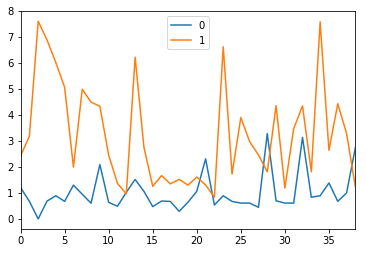

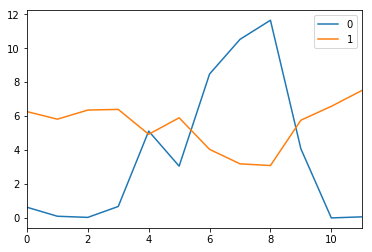

In [54]:
H1, A1, T1 = learn_HAT_new(case, tensor, 2, 2, dis=True, lr=0.1, num_iter=1000, decay_mul=0.99995, lam=1, H_known=(df['area']/df['area'].max()).values.reshape(-1, 1))
pd.DataFrame(H1).plot()
pd.DataFrame(T1).plot()

1
(216.80763817166198, 0.10000000000000001, 0, 28)
(36.815726277503408, 0.097530930243951111, 500, 25)
(31.804801440211808, 0.095122823542504578, 1000, 25)
(31.505838167832273, 0.092774174675316845, 1500, 26)
(31.395690312624538, 0.090483515586984642, 2000, 25)
(31.260073405787359, 0.088249414469416615, 2500, 25)
(31.105906360416796, 0.086070474866862021, 3000, 26)
(31.064670808249854, 0.083945334803036675, 3500, 25)


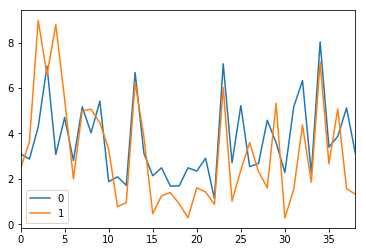

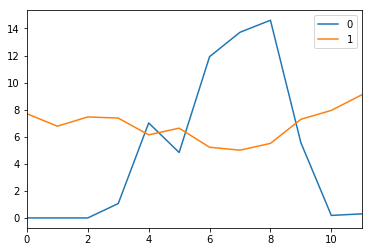

In [39]:
H1, A1, T1 = learn_HAT_new(case, tensor, 2, 2, dis=True, lr=0.1, num_iter=4000, decay_mul=0.99995, lam=1, H_known=None)
pd.DataFrame(H1).plot()
pd.DataFrame(T1).plot()

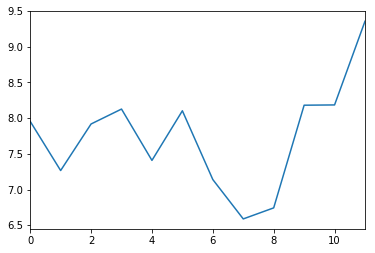

In [64]:
HAT = multiply_case(H1, A1, T1, 2)
pd.DataFrame(HAT[:, 6, :]).mean().plot()

In [23]:
H1, A1, T1 = learn_HAT_new(case, tensor, 10, 10, dis=True, lr=0.1, num_iter=4000, decay_mul=0.99995, lam=1)

1
(211.36775712066967, 0.10000000000000001, 0, 700)
(27.585785060843108, 0.097530930243951111, 500, 419)
(22.248142977658269, 0.095122823542504578, 1000, 400)
(15.420727193069766, 0.092774174675316845, 1500, 367)
(14.340401031583999, 0.090483515586984642, 2000, 568)
(13.701735636551732, 0.088249414469416615, 2500, 578)
(13.212731498111486, 0.086070474866862021, 3000, 585)
(12.828608555053787, 0.083945334803036675, 3500, 590)


In [22]:
H1, A1, T1 = learn_HAT_old(case, tensor, 10, 10, dis=True, lr=0.1, num_iter=2000, decay_mul=0.99995)

(210.87346344509365, 0.10000000000000001, 0, 700)
(26.876927029533967, 0.097530930243951111, 500, 388)
(21.395666967026301, 0.095122823542504578, 1000, 362)
(14.559229720415686, 0.092774174675316845, 1500, 346)


In [205]:
H2, A2, T2 = learn_HAT_new(case, tensor, 10, 10, dis=True, lr=0.1, num_iter=5000, decay_mul=0.999, lam=0.01)

0.01
(210.87840779584073, 0.10000000000000001, 0, 700)
(29.112409949931777, 0.060637894486118477, 500, 411)
(25.868699682243154, 0.036769542477096372, 1000, 369)
(25.065140512433988, 0.022296276370290212, 1500, 368)
(24.097826252832199, 0.013519992539749946, 2000, 379)
(23.083296218205199, 0.0081982388107846599, 2500, 371)
(22.19954384038402, 0.0049712393998036161, 3000, 368)
(21.582297591312017, 0.0030144549019052664, 3500, 363)
(21.184205367361375, 0.0018279019827489415, 4000, 363)
(20.938107091184342, 0.0011084012756089705, 4500, 363)


In [206]:
H2, A2, T2 = learn_HAT_new(case, tensor, 10, 10, dis=True, lr=1, num_iter=5000, decay_mul=0.999, lam=0.0)

0.0
(208.43776626939658, 1.0, 0, 699)
(34.04816640822493, 0.60637894486118471, 500, 700)
(22.544674353625322, 0.36769542477096373, 1000, 695)
(16.455453491879311, 0.22296276370290211, 1500, 698)
(15.638065739866798, 0.13519992539749945, 2000, 652)
(11.616154964271125, 0.081982388107846596, 2500, 569)
(8.0455080189338908, 0.049712393998036161, 3000, 331)
(7.9539584372575858, 0.030144549019052662, 3500, 328)
(7.9070861309352578, 0.018279019827489414, 4000, 327)
(7.8805781082691455, 0.011084012756089705, 4500, 326)


In [207]:
H2, A2, T2 = learn_HAT_new(case, tensor, 10, 10, dis=True, lr=1, num_iter=5000, decay_mul=0.999, lam=0.00001)

1e-05
(208.43777152618921, 1.0, 0, 699)
(34.267204672385922, 0.60637894486118471, 500, 700)
(69.488289822414998, 0.36769542477096373, 1000, 306)
(40.139608476129908, 0.22296276370290211, 1500, 321)
(22.122356422039715, 0.13519992539749945, 2000, 323)
(12.10322317757363, 0.081982388107846596, 2500, 325)
(8.3258463124830051, 0.049712393998036161, 3000, 332)
(8.2667623113825091, 0.030144549019052662, 3500, 326)
(8.2339985155083735, 0.018279019827489414, 4000, 325)
(8.2148480987047385, 0.011084012756089705, 4500, 325)


In [209]:
H2, A2, T2 = learn_HAT(case, tensor, 10, 10, dis=True, lr=1, num_iter=5000, decay_mul=0.999)

(208.43776626939658, 1.0, 0, 699)
(34.04816640822493, 0.60637894486118471, 500, 700)
(22.544674353625322, 0.36769542477096373, 1000, 695)
(16.455453491879311, 0.22296276370290211, 1500, 698)
(15.638065739866798, 0.13519992539749945, 2000, 652)
(11.616154964271125, 0.081982388107846596, 2500, 569)
(8.0455080189338908, 0.049712393998036161, 3000, 331)
(7.9539584372575858, 0.030144549019052662, 3500, 328)
(7.9070861309352578, 0.018279019827489414, 4000, 327)
(7.8805781082691455, 0.011084012756089705, 4500, 326)


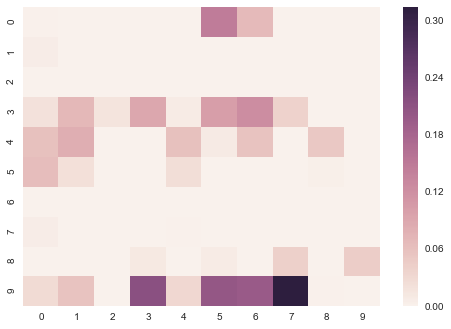

In [208]:
sns.heatmap(A[5])

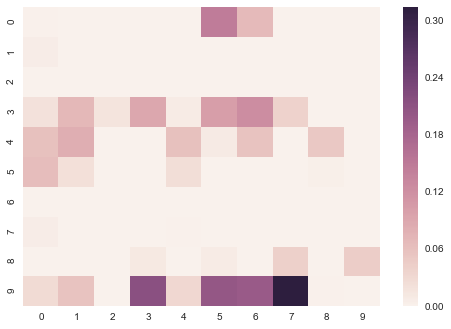

In [149]:
import seaborn as sns
sns.heatmap(A[5])

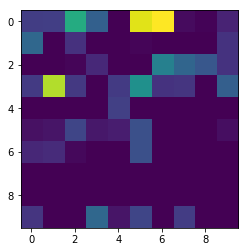

In [143]:
plt.imshow(A[3])

In [135]:
HAT.shape

(39, 7, 12)

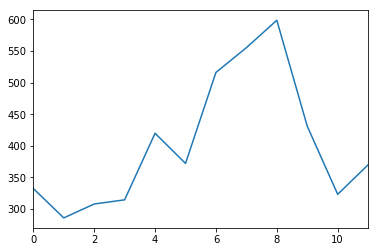

In [136]:
HAT = multiply_case(H, A, T, case)
pd.DataFrame(HAT[:, 0, :]).mean().plot()

In [20]:
pred = {}
sd = {}
out = {}
n_splits = 10
NUM_RANDOM = 4
TRAIN_SPLITS = range(10, 110, 40)
case = 2

cost = 'abs'
for algo in ['adagrad']:
    np.random.seed(0)
    pred[algo] = {}
    for a in range(2, 3):
       
        pred[algo][a] = {}
        for random_seed in range(NUM_RANDOM):
            pred[algo][a][random_seed] = {}
            for appliance in APPLIANCES_ORDER:
                pred[algo][a][random_seed][appliance] = {f:[] for f in TRAIN_SPLITS}

        kf = KFold(n_splits=n_splits)
        for random_seed in range(NUM_RANDOM):

            for train_percentage in TRAIN_SPLITS:
                print(algo, a, random_seed,train_percentage)
                for train_max, test in kf.split(df):

                    num_train = int((train_percentage*len(train_max)/100)+0.5)
                    if train_percentage==100:
                        train = train_max
                    else:
                        train, _ = train_test_split(train_max, train_size = train_percentage/100.0, random_state=random_seed)
                    train_ix = df.index[train]
                    test_ix = df.index[test]

                    num_test = len(test_ix)
                    train_test_ix = np.concatenate([test_ix, train_ix])
                    df_t, dfc_t = df.ix[train_test_ix], dfc.ix[train_test_ix]
                    agg_tensor = get_tensor_appliance(df_t, dfc_t, "aggregate")
                    agg_tensor_copy = agg_tensor.copy()
                    H, A_agg, T = learn_HAT_adagrad(case, agg_tensor, a, a, num_iter=1000, lr=1, dis=False, cost_function=cost)
                    A_appliances = {}
                    for appliance in APPLIANCES_ORDER[1:]:
                        tensor = get_tensor_appliance(df_t, dfc_t, appliance)
                        tensor_copy = tensor.copy()
                        tensor_copy[:num_test, :, :] = np.NaN
                        H, A_appliances[appliance], T = learn_HAT_adagrad(case, tensor, a, a, num_iter=1000, lr=1, dis=False,
                                              cost_function=cost, H_known=H, T_known=T)
    
                        HAT = multiply_case(H, A_appliances[appliance], T, case)
                        pred[algo][a][random_seed][appliance][train_percentage].append(pd.DataFrame(HAT[:num_test, 0, :], index=test_ix))


('adagrad', 2, 0, 10)
('adagrad', 2, 0, 50)
('adagrad', 2, 0, 90)
('adagrad', 2, 1, 10)
('adagrad', 2, 1, 50)
('adagrad', 2, 1, 90)
('adagrad', 2, 2, 10)
('adagrad', 2, 2, 50)
('adagrad', 2, 2, 90)
('adagrad', 2, 3, 10)
('adagrad', 2, 3, 50)
('adagrad', 2, 3, 90)


In [37]:
A_appliances['fridge']

array([[[ 2.0197186 ,  0.        ],
        [ 0.12432689,  0.        ]]])

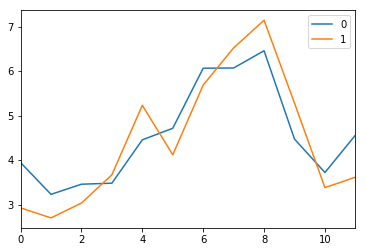

In [40]:
pd.DataFrame(T).plot()

In [25]:
from common import compute_rmse_fraction
out = {}
for algo in ['adagrad']:
    out[algo] = {}
    for a in range(2, 3):
        out[algo][a] = {}
        for random_seed in range(NUM_RANDOM):
            out[algo][a][random_seed] = {}

            for appliance in APPLIANCES_ORDER[1:]:
                out[algo][a][random_seed][appliance] = {}
                for f in TRAIN_SPLITS:
                    s = pd.concat(pred[algo][a][random_seed][appliance][f]).ix[df.index]
                    if appliance=="hvac":
                            out[algo][a][random_seed][appliance][f] = compute_rmse_fraction(appliance,s[range(4, 10)],'SanDiego')[2]
                    else:   
                        out[algo][a][random_seed][appliance][f] = compute_rmse_fraction(appliance, s,'SanDiego')[2]

    

/Users/nipunbatra/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  del sys.path[0]


In [32]:
pd.Panel(out['adagrad'][2]).mean(axis=0)

,dw,fridge,hvac,mw,oven,wm
10,1.810467,6.334669,16.248818,1.737886,2.083915,0.556813
50,1.825415,7.305924,17.177552,1.801521,2.109104,0.599455
90,1.851658,7.821781,19.284749,1.859911,2.186930,0.707624
